# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:2.15 
Członkowie: Mikołaj Grzesik, Filip Jabłoński, Tomasz Drozd

---

# Zestaw zadań 12: Analiza wariancji

In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Funkcje do wykorzystania

In [5]:
def vizualize_test_result(pdf, statistic, rejection_region):
    """
    Parameters
    -------
    pdf: pandas.DataFrame
        Tablica zawierająca informacje niezbędne do wykreślenia funkcji gęstości prawdopodobieństwa wykorzystywanego w teście rozkładu
        teoretycznego - index z wariantami zmiennej losowej i nadaną nazwą zmiennej (np. x) oraz pojedynczą kolumnę z wartościami
        gęstościami prawdopodobieństwa wyliczonymi dla poszczególnych wariantów o nadanej nazwie bazującej na nazwie zmiennej (np. f(x)).
    statistic: float
        Wartość statystyki testowej wyliczonej na podstawie próby losowej.
    rejection_region: list
        Lista zawierająca trzy elementy pozwalające na określenie obszaru krytycznego w następującej kolejności:
         - wartość dolnej granicy przedziału,
         - wartość górnej granicy przedziału,
         - "inner" lub "outer" w zależności od tego, czy ma być zakolorowana wewnętrzna, czy zewnętrzna część przedziału.
    """
    pdf_name= pdf.columns[0]
    
    fig, axes = plt.subplots(1, 1, figsize=(8, 3), facecolor='white')

    axes.plot(pdf.index, pdf[pdf_name], color="grey")

    if rejection_region[2]=="inner":
        axes.fill_between(pdf.index, pdf[pdf_name], 0, where=((pdf.index > rejection_region[0]) & (pdf.index<rejection_region[1])), color='red', alpha=0.5)
    elif rejection_region[2]=="outer":
        axes.fill_between(pdf.index, pdf[pdf_name], 0, where=((pdf.index < rejection_region[0]) | (pdf.index>rejection_region[1])), color='red', alpha=0.5)
    
    axes.vlines(x=statistic, ymin=0, ymax=np.max(pdf[pdf_name]/3), color="blue")
    
    axes.set_xlabel(pdf.index.name)
    axes.set_ylabel(pdf_name)
    
def vizualize_HSD_test_result(HSD, HSD_alpha):
    """
    Parameters
    -------
    HSD: DataFrame
        Tablica zawierająca wartości statystyki HSD wyliczonych na podstawie poszczególnych par porównywanych prób losowych.
        Nazwy kolumn i wierszy tablicy odpowiadają nazwom poszczególnych prób losowych.
    HSD_alpha: float
        Wartość statystyki HSD_alpha.    
    """
    fig, axes = plt.subplots(1, 1, figsize=(6,6), facecolor='white')
    axes = sns.heatmap(HSD, ax=axes, annot=True, annot_kws={"size": 10}, fmt=".3f", cmap="coolwarm", center=HSD_alpha)
    axes.set_xlabel("Próbki losowe")
    axes.set_ylabel("Próbki losowe")

### Dane do zadań

W celu wygenerowania danych wykorzystywanych w zawartych w notatniku zadaniach i komórkach testowych wykonaj poniższe komórki.

In [6]:
# Dane do testów 1
test_data_1 = pd.DataFrame(columns=["A1", "A2", "A3"])
test_data_1["A1"] = [1802, 1992, 1854, 1880, 1761, 1900]
test_data_1["A2"] = [1664, 1755, 1823, 1862, np.nan, np.nan]
test_data_1["A3"] = [1877, 1710, 1882, 1720, 1950, np.nan]
test_data_1

,A1,A2,A3
0,1802,1664.0,1877.0
1,1992,1755.0,1710.0
2,1854,1823.0,1882.0
3,1880,1862.0,1720.0
4,1761,NaN,1950.0
5,1900,NaN,NaN


In [7]:
# Dane do testów 2
test_data_2 = pd.DataFrame(columns=["B1", "B2", "B3"])
test_data_2["B1"] = [9, 8, 7, 5]
test_data_2["B2"] = [9, 7, 6, 5]
test_data_2["B3"] = [4, 3, 1, 1]
test_data_2

,B1,B2,B3
0,9,9,4
1,8,7,3
2,7,6,1
3,5,5,1


In [8]:
# Dane do testów 3
test_data_3 = pd.DataFrame(columns=["C1", "C2", "C3", "C4", "C5", "C6"])
test_data_3["C1"] = np.hstack([sp.stats.norm.rvs(0.03, 1.5, 38, random_state=17), np.full(12, np.NaN)])
test_data_3["C2"] = np.hstack([sp.stats.norm.rvs(0.42, 1.5, 45, random_state=43), np.full(5, np.NaN)])
test_data_3["C3"] = np.hstack([sp.stats.norm.rvs(-0.12, 1.5, 42, random_state=14), np.full(8, np.NaN)])
test_data_3["C4"] = sp.stats.norm.rvs(0.06, 1.5, 50, random_state=18)
test_data_3["C5"] = np.hstack([sp.stats.norm.rvs(-0.39, 1.5, 43, random_state=123), np.full(7, np.NaN)])
test_data_3["C6"] = np.hstack([sp.stats.norm.rvs(0.12, 1.5, 39, random_state=13), np.full(11, np.NaN)])
test_data_3.head()

,C1,C2,C3,C4,C5,C6
0,0.444399,0.806100,2.207009,0.179143,-2.018446,-0.948586
1,-2.751942,-0.942722,-0.001221,3.345304,1.106018,1.250650
2,0.965852,-0.147755,0.140965,-0.142338,0.034468,0.053245
3,1.747967,-0.382373,-0.228505,0.300777,-2.649442,0.797719
4,1.585786,1.707110,-3.126494,0.724047,-1.257900,2.137653


### Zadanie 1: Jednoczynnikowa analiza wariancji [7 pkt]

Przygotuj funkcję `one_way_anova()`, która będzie weryfikować hipotezę o równości wartości przeciętnych i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna wykorzystywać udostępnioną na początku notatnika funkcję `vizualize_test_result()` do generowania wykresu zawierającego:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wskazującą obliczoną wartość statystyki.

Uwaga! Celem zadanie jest zapoznanie się ze schematem metody i samodzielne napisanie funkcji od podstaw. W związku z tym podczas rozwiązywania zadania nie należy korzystać z gotowych funkcji przeprowadzających analizę wariancji.

In [9]:
def one_way_anova(data, alpha):
    """
    data: DataFrame
        Tablica zawierająca domyślny indeks i dowolnie nazwane kolumny (nazwy prób losowych) z wynikami prób losowych. Znajdujące się w tablicy wartości NaN nie są wynikami wchodzącymi w skład prób losowych,
        a jedynie uzupełniają puste miejsca w tablicy powstałe na skutek różnej liczebności poszczególnych prób.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    F: float
        Wyliczona na podstawie próby losowej wartość statystyki F.
    F_alpha: float
        Wartość statystyki F_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    # YOUR CODE HERE
    temp = data.shape[0] # ilosc wierszy 
    k = data.shape[1] # ilosc kolumn
    print(k)

    # liczymy ilosc komorek bez na z calego dataframe
    n=0
    for i in range(k):
        for j in range(temp):
            if not pd.isna(data.iloc[j][i]):
                n  += 1
    print(f'Liczba komórek bez nan wynosi: {n}')

    # liczymy srednia z calosci 
    x_sr = 0
    for i in range(k):
        for j in range(temp):
            if not pd.isna(data.iloc[j][i]):
                x_sr += data.iloc[j][i]
    x_sr = x_sr / n
    print(f' Srednia  wynosi: {x_sr}')

    # liczymy srednia z posczegolnych kolumn 
    x_col = [0] * k
    n_col = [0] * k # trzeba dodac bo dzielimy przez tyyle ile jest wartosci nie nan wiec rozne dla kazdej z kolumn 
    
    for i in range(k):
        for j in range(temp):
            if not pd.isna(data.iloc[j][i]):
                x_col[i] += data.iloc[j][i]
                n_col[i] += 1
        x_col[i] = x_col[i] / n_col[i]
    print(f' Srednie poszczegolnych kolumn: {x_col}')
    
    # liczymy  q_G
    q_G =0
    res = 0
    for i in range(k):
        res += data.count() * (( x_col - x_sr)**2) # data.count() to ilosc wierszy w poszczegolnych kolumnach ktore sa liczone 
    q_G = res.sum() / k
    print(f'q_G wynosi: {q_G}')

    
    # liczymy q_R
    q_R = 0
    for i in range(k):
        for j in range(temp): # do temp bo to maksymalna ilosc wierszy a przez ifa bedziemy zawezac dla kazdej iteracji i uwzgledniac tylko tyle ile jest bez nan ( tam gdzie nan to pominie ) 
            if not pd.isna(data.iloc[j, i]): # 
                q_R += (data.iloc[j, i] - x_col[i]) ** 2
    
    print(f'q_R wynosi: {q_R}')

    mian_1 = k - 1
    mian_2 = n - k 
    first = q_G / mian_1
    second = q_R / mian_2
    F = first / second

    print(f' Wartosc F wynosi : {F}')

    # Etap 4

    F_alpha = sp.stats.f.ppf(1- alpha, k - 1, n - k)
    print(f' Wartosc F_alpha wynosi: {F_alpha}')
    H = 0
    if F >= F_alpha:
        H = 1
    print(f'Wartosc H wynosi: {H}')
    
    # wizualizacja 
    x = np.linspace(sp.stats.f.ppf(0.0001, dfn=k-1, dfd=n-k), sp.stats.f.ppf(0.9999, dfn=k-1, dfd=n-k), 1000)
    y = sp.stats.f.pdf(x, dfn=k-1, dfd=n-k)
    pdf = pd.DataFrame(data=y, index=x, columns=['pdf'])
    
    rejection_region = [F_alpha, np.inf, "inner"]
    vizualize_test_result(pdf, F, rejection_region)
    plt.title(f'Wizualizacja wyników przy założeniu poziomu ufności 1-alpha={1-alpha}')

    return F, F_alpha, H
    


3
Liczba komórek bez nan wynosi: 15
 Srednia  wynosi: 1828.8
 Srednie poszczegolnych kolumn: [1864.8333333333333, 1776.0, 1827.8]
q_G wynosi: 18946.766666666634
q_R wynosi: 100863.63333333333
 Wartosc F wynosi : 1.127072228543553
 Wartosc F_alpha wynosi: 3.8852938346523946
Wartosc H wynosi: 0
3
Liczba komórek bez nan wynosi: 12
 Srednia  wynosi: 5.416666666666667
 Srednie poszczegolnych kolumn: [7.25, 6.75, 2.25]
q_G wynosi: 60.666666666666664
q_R wynosi: 24.25
 Wartosc F wynosi : 11.257731958762886
 Wartosc F_alpha wynosi: 4.256494729093748
Wartosc H wynosi: 1
6
Liczba komórek bez nan wynosi: 257
 Srednia  wynosi: 0.1447852722397074
 Srednie poszczegolnych kolumn: [0.1901517453682884, 0.7367179711314564, -0.2996189517155875, 0.4522645872320745, -0.6083424117006486, 0.3323392372890546]
q_G wynosi: 54.62901345916387
q_R wynosi: 572.0573265816547
 Wartosc F wynosi : 4.793884018647532
 Wartosc F_alpha wynosi: 2.7336800410268243
Wartosc H wynosi: 1


C:\Users\tdroz\AppData\Local\Temp\ipykernel_8444\1192124972.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not pd.isna(data.iloc[j][i]):
C:\Users\tdroz\AppData\Local\Temp\ipykernel_8444\1192124972.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not pd.isna(data.iloc[j][i]):
C:\Users\tdroz\AppData\Local\Temp\ipykernel_8444\1192124972.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_sr += data.iloc[j][i]
C:\User

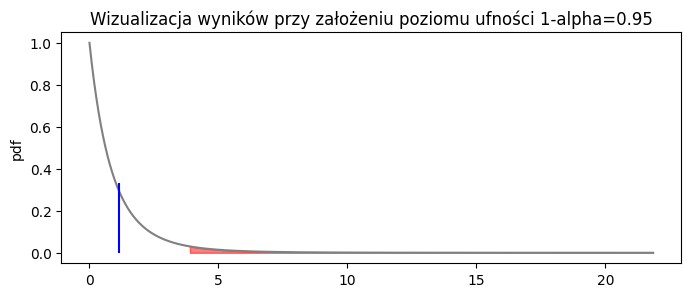

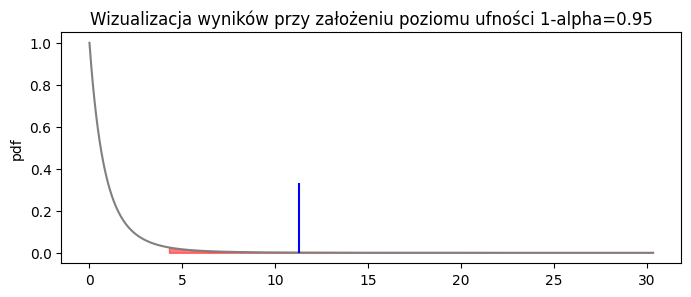

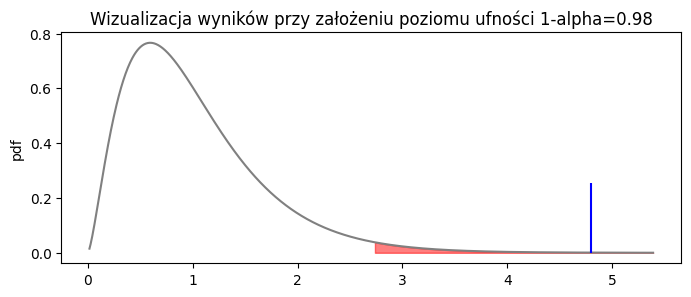

In [10]:
### Komórka testowa
assert np.all(np.isclose(one_way_anova(test_data_1, 0.05), (1.127072228543553, 3.8852938346523946, 0)))
assert np.all(np.isclose(one_way_anova(test_data_2, 0.05), (11.25773195876289, 4.256494729093748, 1)))
assert np.all(np.isclose(one_way_anova(test_data_3, 0.02), (4.79388401864753, 2.7336800410268243, 1)))

### Zadanie 2: Test HSD Tukeya [8 pkt]

Przygotuj funkcję `tukey_HSD_test()`, która będzie przeprowadzać test HSD Tukeya dla wszystkich par prób losowych w analizowanym zestawie danych i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna wykorzystywać udostępnioną na początku notatnika funkcję `vizualize_HSD_test_result()` do generowania wykresu zawierającego:
 - wykres heatmap wyników testu ze skalą kolorów ustaqioną na coolwarm wycentrowaną na wartości statystyki HSD_alpha (odcienie ciepłe dla pól o wartości współczynnika HSD większej od HSD_alpha, odcienie zimne dla pól o wartości współczynnika HSD mniejszej od HSD_alpha).

Uwaga! Celem zadanie jest zapoznanie się ze schematem metody i samodzielne funkcji napisanie od podstaw. W związku z tym podczas rozwiązywania zadania nie należy korzystać z gotowych funkcji przeprowadzających testu HSD Tukeya. W celu otrzymania wartości parametru `HSD_alpha` należy skorzystać z funkcji modułu `sp.stats.studentized_range`.

In [11]:
def tukey_HSD_test(data, alpha):
    """
    data: DataFrame
        Tablica zawierająca domyślny indeks i dowolnie nazwane kolumny (nazwy prób losowych) z wynikami prób losowych.
        Znajdujące się w tablicy wartości NaN nie są wynikami wchodzącymi w skład prób losowych,
        a jedynie uzupełniają puste miejsca w tablicy powstałe na skutek różnej liczebności poszczególnych prób.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    HSD: DataFrame
        Tablica zawierająca wartości statystyki HSD wyliczonych na podstawie poszczególnych par porównywanych prób losowych.
        Nazwy kolumn i wierszy tablicy odpowiadają nazwom poszczególnych prób losowych.
    HSD_alpha: float
        Wartość statystyki HSD_alpha.
    H: DataFrame
        Tablica zawierająca wartości int określające wynik testu dla poszczególnych par porównywanych prób losowych:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
        Nazwy kolumn i wierszy tablicy odpowiadają nazwom poszczególnych prób losowych.
    """    

    k = data.shape[1]
    temp = data.shape[0]
    n=0
    for i in range(k):
        for j in range(temp):
            if not pd.isna(data.iloc[j][i]):
                n  += 1
    
    # srednie z kolumn: 
    x_col = data.mean()
    n_col = data.count()

    # Bedziemy obliczac q_R
    q_R = 0
    for i in range(k):
        for j in range(temp):
            if not pd.isna(data.iloc[j][i]):
                q_R += (data.iloc[j,i] - x_col[i] ) ** 2

    
    MSE = q_R / (n - k)
    

    
    # HSD dla każdej pary
    HSD = pd.DataFrame(index=data.columns, columns=data.columns, dtype=float)
    for i in range(k):
        for j in range(k):
            if i != j:
                HSD.iloc[i, j] = abs(x_col[i] - x_col[j]) / np.sqrt(MSE / 2 * (1 / n_col[i] + 1 / n_col[j]))
    HSD = HSD.fillna(0)
    
    # HSD_alpha
    HSD_alpha = sp.stats.studentized_range.ppf(1 - alpha, k, n-k)

    
    H = HSD.map(lambda x: 1 if x >= HSD_alpha else 0)
    def vizualize_HSD_test_result(HSD, HSD_alpha):
        fig, axes = plt.subplots(1, 1, figsize=(6, 6), facecolor='white')
        axes = sns.heatmap(HSD, ax=axes, annot=True, annot_kws={"size": 10}, fmt=".3f", cmap="coolwarm", center=HSD_alpha)
        axes.set_xlabel("Próbki losowe")
        axes.set_ylabel("Próbki losowe")
        plt.title(f'Heatmap wyników testu Tukey HSD przy poziomie istotności {1-alpha:.2f}')
    vizualize_HSD_test_result(HSD, HSD_alpha)
    

    
    return HSD, HSD_alpha, H

                
                
    def vizualize_HSD_test_result(pdf, statistic, rejection_region):
        plt.figure(figsize=(10, 6))
        sns.heatmap(pdf, cmap='coolwarm', center=HSD_alpha, annot=True, fmt=".2f")
        plt.title('Heatmap wyników testu Tukey HSD')
        
        

    vizualize_HSD_test_result(HSD, None, None)
    plt.title(f'Wizualizacja wyników przy założeniu poziomu ufności 1-alpha={1-alpha}')    

C:\Users\tdroz\AppData\Local\Temp\ipykernel_8444\3179612019.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not pd.isna(data.iloc[j][i]):
C:\Users\tdroz\AppData\Local\Temp\ipykernel_8444\3179612019.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not pd.isna(data.iloc[j][i]):
C:\Users\tdroz\AppData\Local\Temp\ipykernel_8444\3179612019.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  q_R += (data.iloc[j,i] - x_col[

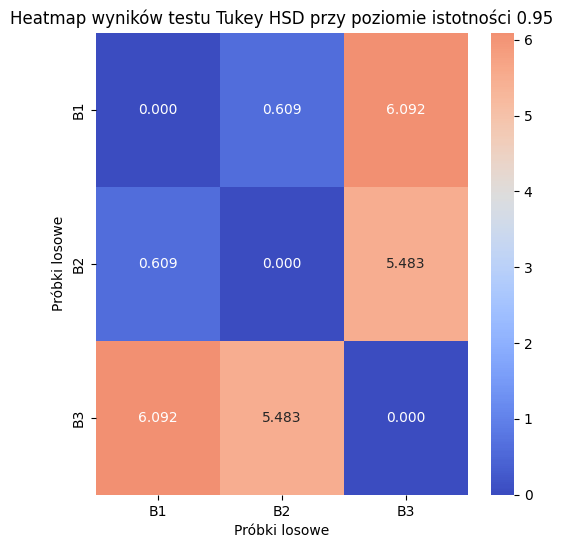

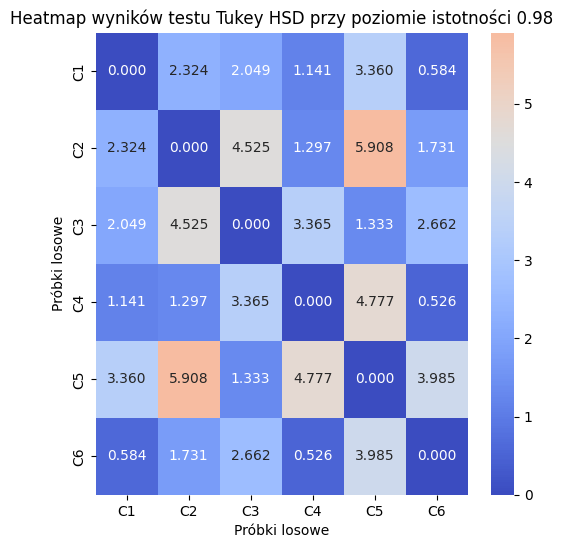

In [12]:
### Komórka testowa

HSD, HSD_alpha, H = tukey_HSD_test(test_data_2, 0.05)
# Test 1 Kształt tablicy
assert HSD.shape == (3, 3)
# Test 2 Kolumny i indeks
assert len(set(list(HSD.columns)) & set(['B1', 'B2', 'B3'])) == 3
assert len(set(list(HSD.index)) & set(['B1', 'B2', 'B3'])) == 3
assert len(set(list(H.columns)) & set(['B1', 'B2', 'B3'])) == 3
assert len(set(list(H.index)) & set(['B1', 'B2', 'B3'])) == 3
# Test 3 Wartości 
assert np.all(np.isclose(HSD.values , np.array([[0., 0.6092077, 6.09207699], [0.6092077, 0., 5.48286929], [6.09207699, 5.48286929, 0.]])))
assert np.isclose(HSD_alpha, 3.948492203457512)
assert np.all(np.isclose(H.values , np.array([[0, 0, 1], [0, 0, 1], [1, 1, 0]])))

HSD, HSD_alpha, H = tukey_HSD_test(test_data_3, 0.02)
# Test 1 Kształt tablicy
assert HSD.shape == (6, 6)
# Test 2 Kolumny i indeks
assert len(set(list(HSD.columns)) & set(["C1", "C2", "C3", "C4", "C5", "C6"])) == 6
assert len(set(list(HSD.index)) & set(["C1", "C2", "C3", "C4", "C5", "C6"])) == 6
# Test 3 Wartości 
assert np.all(np.isclose(HSD.values , np.array([[0.       , 2.32398801, 2.04925654, 1.14092171, 3.35959821, 0.58434888],
                                               [2.32398801, 0.        , 4.52485149, 1.29679893, 5.90844249, 1.73148729],
                                               [2.04925654, 4.52485149, 0.        , 3.36510324, 1.33306438, 2.66216438],
                                               [1.14092171, 1.29679893, 3.36510324, 0.        , 4.77709994, 0.52585424],
                                               [3.35959821, 5.90844249, 1.33306438, 4.77709994, 0.        , 3.98505536],
                                               [0.58434888, 1.73148729, 2.66216438, 0.52585424, 3.98505536, 0.        ]])))
assert np.isclose(HSD_alpha, 4.50539007862777)
assert np.all(np.isclose(H.values , np.array([[0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, 0],
                                               [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0],
                                               [0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0]])))

### Zadanie 3: Wykorzystanie dedykowanych funkcji [5 pkt]

#### a)
Korzystając z funkcji `sp.stats.f_oneway()` zweryfikuj hipotezę o równości wartości średnich zmiennych zawartych w zmiennej `test_data_2`. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.95.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_1`, oraz przygotuj zmienną `H_1` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

Uwagi do wykonania zadania:
 - ustaw następującą wartość argumentu funkcji wykonującej test statystyczny odpowiedzialnego za radzenie sobie z wartościami nan: `nan_policy="omit"`.

In [13]:
# YOUR CODE HERE
alpha = 0.05
col = []
for i in test_data_2.columns:
    kolumny = test_data_2[i].dropna()  # usuwamy wartosci Nan 
    col.append(kolumny)  # dodajemy kolumny bez nan do listy 


res = sp.stats.f_oneway(*col) # * sluzy do rozpakowania listy na pojedyncze argumenty, elementy listy jako oddzielne argumenty funkcji,, kazda kolumna jest traktowana jako osobna grupa do porownania 

pvalue_1 = res.pvalue
H_1 = 0
if pvalue_1 < alpha:
    H_1 = 1

print(H_1)
print(pvalue_1)



1
0.003554140748362928


In [ ]:
# Komórka testowa
assert np.isclose(pvalue_1, 0.003554140748362928)
assert H_1 == 1

#### b)
Korzystając z funkcji `sp.stats.tukey_hsd()` zweryfikuj hipotezę o równości wartości średnich poszczególnych par zmiennych zawartych w zmiennej `test_data_2`. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.95.

Zapisz obliczone wartości pvalue do zmiennej `pvalue_2` (będzie to macierz), oraz przygotuj zmienną `H_2` zawierającą wynik testów statystycznych (macierz zawierająca: 0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

Uwagi do wykonania zadania:
 - funkcja `sp.stats.tukey_hsd()` wymaga wcześniejszego usunięcia z danych wartości NaN.

In [13]:
# YOUR CODE HERE

alpha = 0.05
pvalue_2 = sp.stats.tukey_hsd(test_data_2["B1"].dropna(), test_data_2["B2"].dropna(), test_data_2["B3"].dropna()).pvalue

H_2 = 1*(pvalue_2 < alpha)

print(H_2)
print(pvalue_2)

[[0 0 1]
 [0 0 1]
 [1 1 0]]
[[1.         0.90382813 0.00501795]
 [0.90382813 1.         0.0094373 ]
 [0.00501795 0.0094373  1.        ]]


In [14]:
# Komórka testowa
assert np.all(np.isclose(pvalue_2, np.array([[1.,         0.90382813, 0.00501795],
                                             [0.90382813, 1.,         0.0094373 ],
                                             [0.00501795, 0.0094373,  1.        ]])))
assert np.all(np.isclose(H_2, np.array([[0, 0, 1],
                                        [0, 0, 1],
                                        [1, 1, 0]])))